# Data cleaning and merging

In [ ]:
import pandas as pd

df1 = pd.read_csv("/content/Number_of_companies.csv")  # e.g., soum-level population
df2 = pd.read_excel("/content/Population_age_districts.xlsx", skiprows = 3)
df3 = pd.read_excel("/content/Mongolian banks' loans 2019-2024.xlsx", skiprows = 5, sheet_name = "2024")
df4 = pd.read_excel("/content/Mongolian bank's current accounts and balances 2019-2024.xlsx", skiprows = 5, sheet_name = "2024")
df5 = pd.read_excel("/content/Mongolian banks' deposits 2015-2024.xlsx", skiprows = 5, sheet_name = "2024")
df6 = pd.read_excel("/content/Mongolian bank branches and personnel 2019-2024.xlsx", sheet_name = "2024", skiprows = 6)
df7 = pd.read_excel("/content/Golomt_branches.xlsx")

df3 = df3.rename(columns={
    'Үүнээс:': 'Normal',
    'Unnamed: 5': 'Delinquent',
    'Unnamed: 6': 'Overdue'
})

df5 = df5.rename(columns={
    'From which:': 'Timeless_deposits',
    'Unnamed: 5': 'Time_deposits',
    #'Unnamed: 6': 'Overdue'
})

df6 = df6.rename(columns={
    'Unnamed: 4': 'Branch',
    'Unnamed: 5': 'Settlement_center'
})

df6['Total_banks_branches'] = df6['Branch'] + df6['Settlement_center']

print("df1 columns:", df1.columns.tolist())
print("df2 columns:", df2.columns.tolist())
print("df3 columns:", df3.columns.tolist())
print("df4 columns:", df4.columns.tolist())
print("df5 columns:", df5.columns.tolist())
print("df6 columns:", df6.columns.tolist())
print("df7 columns:", df7.columns.tolist())

cols2 = ['City', 'District', 'Grand Total', 'Total_kids', 'Total_working', 'Total_olders', 'Percentage_kids', 'Percentage_working', 'Percentage_olders']
cols3 = ['City', 'District', 'Total_loan_balance','Total_loans_accounts', 'Normal', 'Delinquent', 'Overdue']
cols5 = ['City', 'District', 'Total_deposits', 'Total_deposits_accounts', 'Time_deposits', 'Timeless_deposits']
cols6 = ['City', 'District', 'Total_banks_branches']


df1 = df1.dropna(subset=['City'])
df2 = df2.dropna(subset=['City'])
df2 = df2[cols2]
df3 = df3[cols3]
df5 = df5[cols5]
df6 = df6[cols6]

for df in [df1, df2, df3, df4, df5, df6, df7]:
    df['City'] = df['City'].astype(str).str.strip().str.lower()
    df['District'] = df['District'].astype(str).str.strip().str.lower()


branch_counts = df7.groupby(['City', 'District']).size().reset_index(name='Golomt_branches')

merged_df = pd.merge(df1, df2, on=['City', 'District'], how='inner')
merged_df = pd.merge(merged_df, df3, on=['City', 'District'], how='inner')
merged_df = pd.merge(merged_df, df4, on=['City', 'District'], how='inner')
merged_df = pd.merge(merged_df, df5, on=['City', 'District'], how='inner')
merged_df = pd.merge(merged_df, df6, on=['City', 'District'], how='inner')
merged_df = pd.merge(merged_df, branch_counts, on=['City', 'District'], how='left')
merged_df['Golomt_branches'] = merged_df['Golomt_branches'].fillna(0).astype(int)

merged_df = merged_df.drop('Number', axis=1)

print("Merged df:", len(df))

merged_df


df1 columns: ['City', 'District', 'Companies']
df2 columns: ['City', 'District', '0-4', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70+', '5-9', '10-14', 'Grand Total', 'Total_kids', 'Total_working', 'Total_olders', 'Percentage_kids', 'Percentage_working', 'Percentage_olders']
df3 columns: ['Number', 'City', 'District', 'Total_loan_balance', 'Normal', 'Delinquent', 'Overdue', 'Total_loans_accounts', 'Үүнээс:.1', 'Unnamed: 9', 'Unnamed: 10']
df4 columns: ['Number', 'City', 'District', 'Total_balances', 'Total_current_accounts']
df5 columns: ['Number', 'City', 'District', 'Total_deposits', 'Timeless_deposits', 'Time_deposits', 'Total_deposits_accounts', 'From which:.1', 'Unnamed: 8']
df6 columns: ['Number', 'City', 'District', 'Branches', 'Branch', 'Settlement_center', 'Unnamed: 6', 'Workers', 'Total_banks_branches']
df7 columns: ['Name', 'City', 'District', 'lat', 'lon']
Merged df: 83


<ipython-input-84-3636067464>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['City'] = df['City'].astype(str).str.strip().str.lower()
<ipython-input-84-3636067464>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['District'] = df['District'].astype(str).str.strip().str.lower()


,City,District,Companies,Grand Total,Total_kids,Total_working,Total_olders,Percentage_kids,Percentage_working,Percentage_olders,...,Delinquent,Overdue,Total_balances,Total_current_accounts,Total_deposits,Total_deposits_accounts,Time_deposits,Timeless_deposits,Total_banks_branches,Golomt_branches
0,говь-алтай,алтай,21,1909,568.0,1253.0,88.0,0.297538,0.656365,0.046097,...,158.248099,207.518385,5375.042866,11871,15676.125117,5213.0,12871.332484,2804.792633,2,0
1,говь-алтай,баян-уул,34,3026,850.0,2027.0,149.0,0.280899,0.669861,0.049240,...,41.684376,8.784859,2084.376542,4858,6991.142922,2142.0,5789.870931,1201.271991,2,0
2,говь-алтай,бигэр,44,2204,616.0,1464.0,124.0,0.279492,0.664247,0.056261,...,21.461958,6.477661,2158.305947,3701,5115.532846,1490.0,4351.552852,763.979993,2,0
3,говь-алтай,бугат,22,2139,621.0,1410.0,108.0,0.290323,0.659187,0.050491,...,42.508236,30.616131,1630.978377,3916,7613.467698,1532.0,6342.170473,1271.297225,2,0
4,говь-алтай,дэлгэр,49,3032,802.0,2069.0,161.0,0.264512,0.682388,0.053100,...,126.604846,124.117105,1950.544576,5504,5865.064568,1949.0,4751.227161,1113.837407,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,хэнтий,батноров,73,5731,1687.0,3678.0,366.0,0.294364,0.641773,0.063863,...,21.593898,36.717167,1874.144549,5170,5572.657733,1653.0,4432.277263,1140.38047,2,0
304,хэнтий,баян-овоо,26,1934,601.0,1228.0,105.0,0.310755,0.634953,0.054292,...,32.783742,40.236375,1060.939288,3103,2603.308827,1317.0,2023.645451,579.663376,2,0
305,хэнтий,мөрөн,32,1845,459.0,1264.0,122.0,0.248780,0.685095,0.066125,...,58.793751,32.894776,899.805254,2717,1179.384067,728.0,847.258737,332.12533,2,0
306,хэнтий,хэрлэн,570,24764,8202.0,15051.0,1511.0,0.331207,0.607777,0.061016,...,1023.566577,959.803574,16899.453091,34770,55404.753895,16685.0,43767.090607,11637.663288,9,1


In [ ]:
from google.colab import files

merged_df.to_excel('merged_df.xlsx', index=False)
files.download('merged_df.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
merged_df.dtypes

,0
City,object
District,object
Companies,object
Grand Total,int64
Total_kids,float64
Total_working,float64
Total_olders,float64
Percentage_kids,float64
Percentage_working,float64
Percentage_olders,float64


In [ ]:
col = ['Companies', 'Normal', 'Delinquent', 'Overdue', 'Time_deposits', 'Timeless_deposits', 'Total_banks_branches']

for c in col:
    merged_df[c] = merged_df[c].astype(str).str.replace(',', '')
    merged_df[c] = pd.to_numeric(merged_df[c], errors='coerce')
    merged_df[c] = merged_df[c].astype('float64')



#Exploratory data analysis, visualizations (EDA)

1. Loans vs population

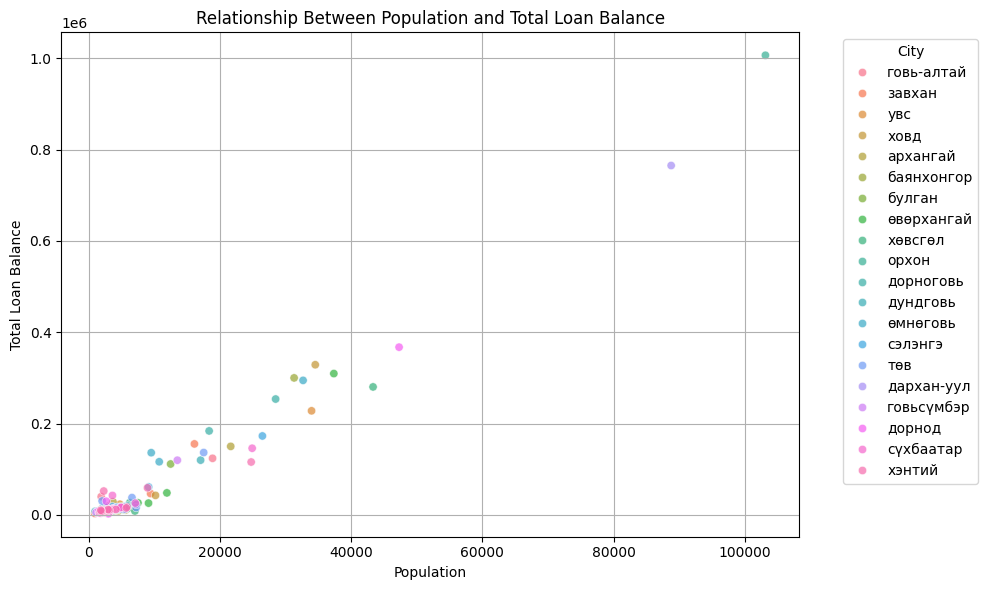

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Remove missing or zero values
df = merged_df.copy()
df = df[(df['Grand Total'] > 0) & (df['Total_loan_balance'] > 0)]

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Grand Total', y='Total_loan_balance', hue='City', alpha=0.7)

plt.title('Relationship Between Population and Total Loan Balance')
plt.xlabel('Population')
plt.ylabel('Total Loan Balance')
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()



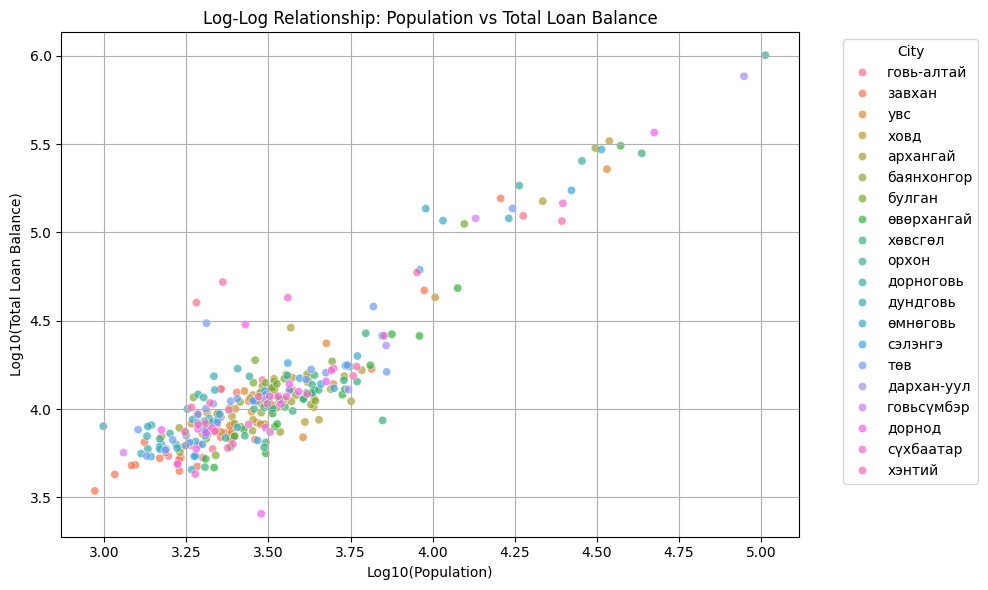

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = merged_df.copy()
df = df[(df['Grand Total'] > 0) & (df['Total_loan_balance'] > 0)]

# Optional: Log-transformed columns
df['log_Population'] = np.log10(df['Grand Total'])
df['log_Loan'] = np.log10(df['Total_loan_balance'])

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='log_Population', y='log_Loan', hue='City', alpha=0.7)

plt.title('Log-Log Relationship: Population vs Total Loan Balance')
plt.xlabel('Log10(Population)')
plt.ylabel('Log10(Total Loan Balance)')
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


2. Loan vs company

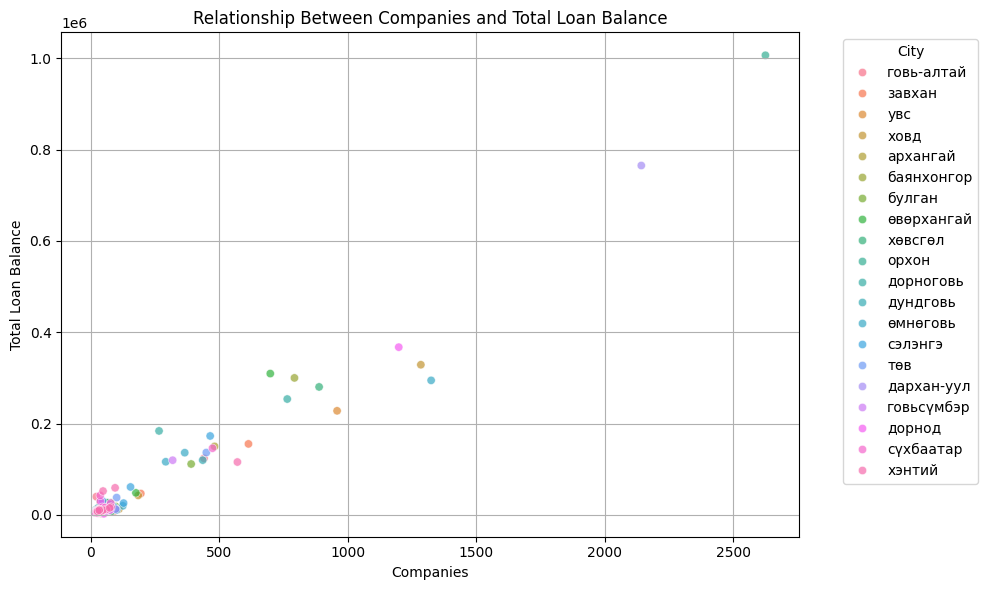

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Remove missing or zero values
df = merged_df.copy()
df = df[(df['Companies'] > 0) & (df['Total_loan_balance'] > 0)]

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Companies', y='Total_loan_balance', hue='City', alpha=0.7)

plt.title('Relationship Between Companies and Total Loan Balance')
plt.xlabel('Companies')
plt.ylabel('Total Loan Balance')
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

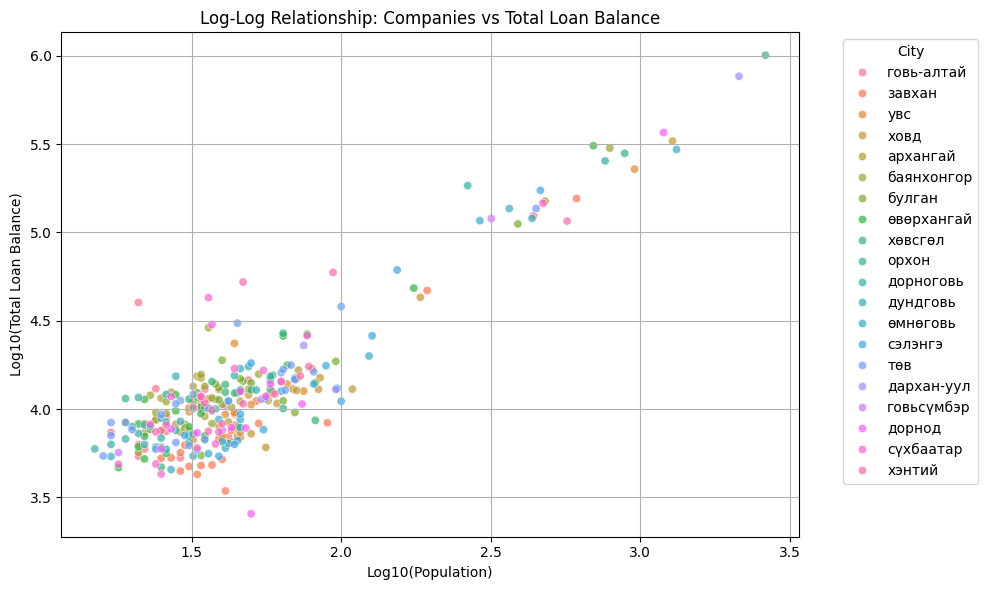

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = merged_df.copy()
df = df[(df['Companies'] > 0) & (df['Total_loan_balance'] > 0)]

# Optional: Log-transformed columns
df['log_Population'] = np.log10(df['Companies'])
df['log_Loan'] = np.log10(df['Total_loan_balance'])

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='log_Population', y='log_Loan', hue='City', alpha=0.7)

plt.title('Log-Log Relationship: Companies vs Total Loan Balance')
plt.xlabel('Log10(Population)')
plt.ylabel('Log10(Total Loan Balance)')
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

#Clustering

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


categorical_cols = ['City', 'District']
numerical_cols = ['Grand Total', 'Total_kids', 'Total_working', 'Total_olders',
                  'Percentage_kids', 'Percentage_working', 'Percentage_olders',
                  'Total_loan_balance', 'Total_loans_accounts', 'Total_balances',
                  'Total_current_accounts', 'Total_deposits', 'Total_deposits_accounts', 'Golomt_branches', 'Companies', 'Normal', 'Delinquent', 'Overdue', 'Time_deposits', 'Timeless_deposits', 'Total_banks_branches']

# Convert other categorical columns with one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['City', 'District'])
    ])

# Create pipeline with preprocessor and clustering model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=4, random_state=42))
])

# Fit model
pipeline.fit(merged_df)

# Predict clusters
clusters = pipeline.predict(merged_df)
merged_df['cluster'] = clusters

# Evaluate clustering
score = silhouette_score(pipeline.named_steps['preprocessor'].transform(merged_df), clusters)
print(f'Silhouette Score: {score:.3f}')


Silhouette Score: 0.209


In [ ]:
merged_df['cluster'] = clusters

In [ ]:
# Show all rows that belong to cluster 0 (for example)
cluster_0_data = merged_df[merged_df['cluster'] == 1]
print(cluster_0_data)



           City      District  Companies  Grand Total  Total_kids  \
16   говь-алтай     есөнбулаг      440.0        18880      5811.0   
32       завхан      улиастай      613.0        16115      4844.0   
58          увс      улаангом      958.0        33966     11463.0   
75         ховд     жаргалант     1284.0        34532     12050.0   
93     архангай  эрдэнэбулган      481.0        21649      6721.0   
114  баянхонгор    баянхонгор      792.0        31307     11376.0   
148  өвөрхангай     арвайхээр      698.0        37361     12681.0   
168     хөвсгөл         мөрөн      888.0        43338     13600.0   
185   дорноговь      сайншанд      764.0        28492      9408.0   
186   дорноговь     замын-үүд      265.0        18359      6023.0   
211    өмнөговь       ханбогд      365.0         9533      2709.0   
215    өмнөговь     цогтцэций      291.0        10752      4139.0   
216    өмнөговь   даланзадгад     1324.0        32674     11481.0   
220     сэлэнгэ        мандал     

In [ ]:
print(merged_df['cluster'].value_counts())


cluster
0    173
2    115
1     18
3      2
Name: count, dtype: int64


#Scoring model

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Step 0: Ensure your input DataFrame is ready
# merged_df must contain one row per soum (district)
# And it must have a 'cluster' column and the following columns:

features = {
    'Grand Total': 0.25,    # Population
    'Total_working': 0.1,
    'Companies': 0.15,
    'Total_loan_balance': 0.1, # Loan volume
    'Delinquent': -0.05,
    'Overdue': -0.05,
    'Total_balances': 0.1,
    'Total_deposits_accounts': 0.1,             # Number of accounts
    'Total_banks_branches': -0.1,               # Competitor branches
    'Golomt_branches': -0.1                    # Golomt already present
}

# Step 1: Normalize the selected features
scaler = MinMaxScaler()
normalized_values = scaler.fit_transform(merged_df[list(features.keys())])
normalized_df = pd.DataFrame(normalized_values, columns=features.keys())

# Step 2: Multiply each feature by its weight
for col, weight in features.items():
    normalized_df[col] = normalized_df[col] * weight

# Step 3: Compute the composite score
merged_df['score'] = normalized_df.sum(axis=1)

# Step 4: Filter to soums with 0 Golomt branches (expansion candidates)
candidates_df = merged_df[merged_df['Golomt_branches'] == 0]

# Step 5: Rank candidates within each cluster
#candidates_df['rank_within_cluster'] = candidates_df.groupby('cluster')['score'].rank(ascending=False)

# Step 6: Sort for review
#ranked_candidates = candidates_df.sort_values(['cluster', 'rank_within_cluster'])

# Output top results per cluster
#print(ranked_candidates[['City', 'District', 'cluster', 'score', 'rank_within_cluster']].head(20))

# Step 5a: Rank candidates within each cluster
candidates_df['rank_within_cluster'] = candidates_df.groupby('cluster')['score'].rank(ascending=False)

# Step 5b: Global rank across all clusters
candidates_df['rank_overall'] = candidates_df['score'].rank(ascending=False)

# Step 6: Sort for review (optional: by cluster or overall rank)
ranked_candidates = candidates_df.sort_values(['rank_overall'])

# Output top results overall
print(ranked_candidates[['City', 'District', 'cluster', 'score', 'rank_within_cluster', 'rank_overall']].head(20))



           City      District  cluster     score  rank_within_cluster  \
93     архангай  эрдэнэбулган        1  0.110467                  1.0   
16   говь-алтай     есөнбулаг        1  0.096947                  2.0   
253         төв       зуунмод        1  0.086694                  3.0   
200    дундговь    сайнцагаан        0  0.085424                  1.0   
128      булган        булган        2  0.065188                  1.0   
263  говьсүмбэр        сүмбэр        0  0.061321                  2.0   
147  өвөрхангай      хархорин        0  0.049426                  3.0   
20       завхан   тосонцэнгэл        0  0.046378                  4.0   
307      хэнтий     бор-өндөр        0  0.030899                  5.0   
225     сэлэнгэ        сайхан        0  0.030803                  6.0   
133  өвөрхангай     бат-өлзий        0  0.029653                  7.0   
144  өвөрхангай         уянга        0  0.029210                  8.0   
24       завхан        их-уул        0  0.024572   

<ipython-input-107-3646544893>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  candidates_df['rank_within_cluster'] = candidates_df.groupby('cluster')['score'].rank(ascending=False)
<ipython-input-107-3646544893>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  candidates_df['rank_overall'] = candidates_df['score'].rank(ascending=False)
